<font size=5 >The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (5N-5S, 170W-120W). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more. Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.

In this problem set, you will use the sea surface temperature (SST) data from NOAA. Download the netCDF4 file (NOAA_NCDC_ERSST_v3b_SST.nc) here.</font>

**<font size=6 >1.1 [5 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.</font>**

**<font size=5 >首先根据经纬度截取nino3.4地区的数据，再求出anoma值</font>**

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset('C:\\Users\\Cao Zhe\\Desktop\\sustech zy\\hjbc\\PS3\\NOAA_NCDC_ERSST_v3b_SST.nc', engine="netcdf4")
ds_nino = ds.sst.sel(lat = slice(-5,5),lon = slice(190,240))#截取nino3.4地区的数据
ds_nino_month_avar = ds_nino.groupby('time.month').mean(dim = ['time','lat','lon'])
ds_nino_avar = ds_nino.mean(dim = ['lat','lon'])
ds_nino_anoma = ds_nino_avar.groupby('time.month') - ds_nino_month_avar
print(ds_nino_anoma)

<xarray.DataArray 'sst' (time: 684)>
array([-3.19580078e-01, -4.68521118e-01, -2.68152237e-01, -1.86967850e-01,
       -1.77595139e-01, -3.57690811e-01, -1.41971588e-01,  1.46579742e-02,
       -1.52215958e-01, -3.79865646e-01, -3.60893250e-01, -2.08696365e-01,
       -1.91473007e-01, -1.34283066e-01, -2.40375519e-01, -1.85127258e-01,
        5.19180298e-02,  2.39383698e-01, -7.03411102e-02, -4.18693542e-01,
       -7.78314590e-01, -7.92385101e-01, -4.96292114e-01, -4.17310715e-01,
       -4.44782257e-01, -4.55940247e-01, -4.36033249e-01, -4.66928482e-01,
       -5.64529419e-01, -4.26885605e-01, -2.76727676e-01, -3.17211151e-01,
       -6.73158646e-01, -6.66118622e-01, -8.17707062e-01, -8.65486145e-01,
       -7.01400757e-01, -3.57038498e-01,  6.96258545e-02,  1.73398972e-01,
       -9.06677246e-02,  7.69157410e-02,  6.87639236e-01,  7.95261383e-01,
        7.12980270e-01,  8.34249496e-01,  9.08538818e-01,  1.08588600e+00,
        8.51554871e-01,  5.23397446e-01, -1.30540848e-01, -6.34

**<font size=6 >1.2 [5 points] Visualize the computed Niño 3.4. Your plot should look similar to this one</font>**

**<font size=5 >先求出窗口为3的滑动平均值，再根据题意画图</font>**

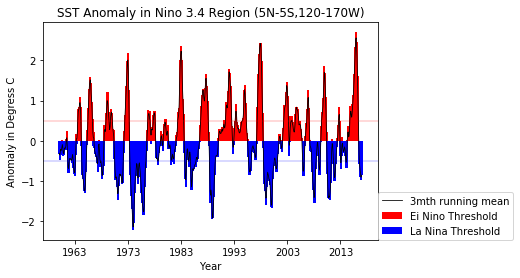

In [2]:
def smooth(x,width):#求窗口为3的滑动平均值
    out0 = np.convolve(x,np.ones(width,dtype=int),'valid')/width
    r = np.arange(1,width-1,2)  
    start = np.cumsum(x[:width-1])[::2]/r  
    stop = (np.cumsum(x[:-width:-1])[::2]/r)[::-1]  
    return np.concatenate(( start , out0, stop ))
ds_nino_anoma_runnningaver = smooth(ds_nino_anoma,3)#滑动窗口得到的均值
a = np.maximum(ds_nino_anoma,0)#将负值全部设为0
b = np.minimum(ds_nino_anoma,0)#将正值全部设为0
X = ds_nino['time']
plt.bar(X,a,width = 150,color = 'r',label='Ei Nino Threshold')
plt.bar(X,b,width = 150,color = 'b',label='La Nina Threshold')
plt.plot(X,ds_nino_anoma_runnningaver,color = 'black',linewidth = 0.8,label='3mth running mean')
plt.axhline(y=0.5, color='r', linestyle='-',alpha=0.2)
plt.axhline(y=-0.5, color='b', linestyle='-',alpha=0.2)
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degress C')
plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)
plt.show()

2. Earth’s energy budget
In this problem set, you will analyze top-of-atmosphere (TOA) radiation data from NASA’s CERES project. Read this post for more about Earth’s energy budget.
Download the data (CERES_EBAF-TOA_200003-201701.nc) here. The size of the data file is 702.5 MB. It will take a minute or two to download. Start by importing xarray, numpy, and matplotlib.

**<font size=6 >2.1 [5 points] Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.</font>**

**先画出toa_lw月均值图**

Text(0.5,1,'toa_lw_all_mon')

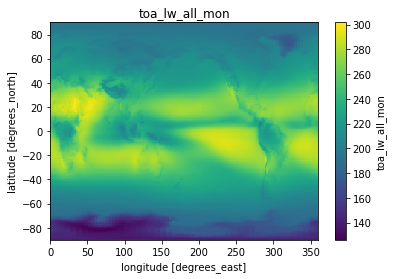

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds = xr.open_dataset('C:\\Users\\Cao Zhe\\Desktop\\sustech zy\\hjbc\\PS3\\CERES_EBAF-TOA_200003-201701.nc', engine="netcdf4")
ds_lw_all = ds.toa_lw_all_mon.mean(dim = ['time'])
ds_sw_all = ds.toa_sw_all_mon.mean(dim = ['time'])
ds_solar = ds.solar_mon.mean(dim = ['time'])
ds_net_all = ds.toa_net_all_mon.mean(dim = ['time'])
ds_sum = ds_solar - ds_lw_all - ds_sw_all
ds_lw_all.plot()
plt.title('toa_lw_all_mon')


**再画出toa_sw_all月均值的图**

Text(0.5,1,'toa_sw_all_mon')

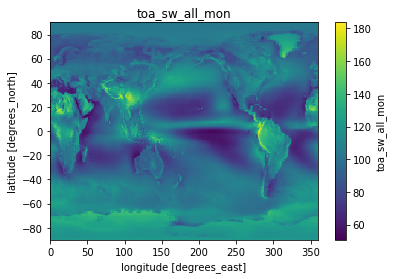

In [4]:
ds_sw_all.plot()
plt.title('toa_sw_all_mon')


**再画出太阳辐射的图**

Text(0.5,1,'solar_mon')

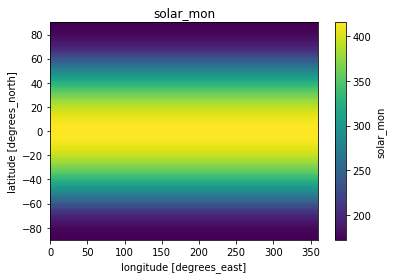

In [5]:
ds_solar.plot()
plt.title('solar_mon')

**再画出净通量**

Text(0.5,1,'toa_net_all_mon')

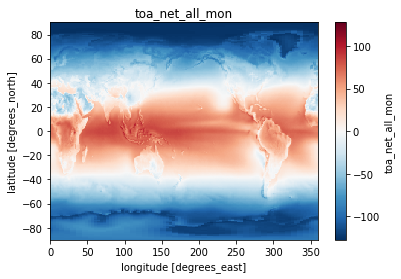

In [6]:
ds_net_all.plot()
plt.title('toa_net_all_mon')

**最后画出辐射-长波-短波的值**

<font size=6 >**与上图比较从视觉上看出两图基本相同,即验证了上述算式的值等于净通量**</font>

Text(0.5,1,'ds_solar - ds_lw_all - ds_sw_all')

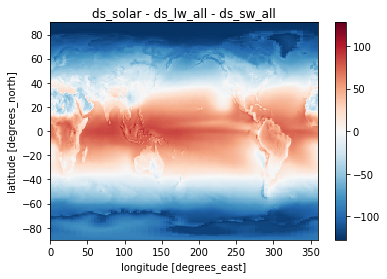

In [7]:
ds_sum.plot()
plt.title('ds_solar - ds_lw_all - ds_sw_all')

**<font size=6 >2.2 [10 points] Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.</font>**

[Hint: Consider calculating the area of each grid]

得到：
**Incoming Solar Flux, Monthly Means = 340.28355233050684**

**Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions = 240.26666558090503**

**Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions = 99.13858336324701**

<font size=6 >**与题目中所给图相比，经过计算后的长波，短波，太阳辐射的值与图中所给的值基本相等**</font>

In [8]:
convert_lat = np.cos(np.deg2rad(ds.lat)) 
#纬度角度转为弧度值再求cos
toa_solar_plus_weight = ds_solar.weighted(convert_lat)
toa_lw_plus_weight = ds_lw_all.weighted(convert_lat)
toa_sw_plus_weight = ds_sw_all.weighted(convert_lat)
solar_radiation = toa_solar_plus_weight.mean(dim=('lon', 'lat','time')).values
lw_radiation = toa_lw_plus_weight.mean(dim=('lon', 'lat','time')).values
sw_radiation = toa_sw_plus_weight.mean(dim=('lon', 'lat','time')).values
print('Incoming Solar Flux, Monthly Means = '+str(solar_radiation))
print('Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions = ' + str(lw_radiation))
print('Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions = ' + str(sw_radiation))

Incoming Solar Flux, Monthly Means = 340.28355233050684
Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions = 240.26666558090503
Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions = 99.13858336324701


**<font size=6 >2.3 [5 points] Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.</font>**

**先求每1纬度的值再画图**

Text(0.5,1,'net in each 1-degree latitude band(W)')

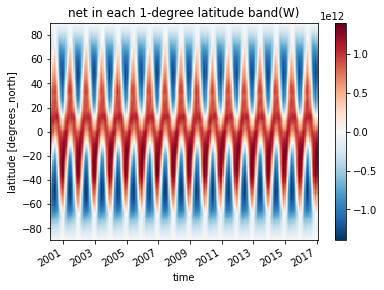

In [9]:
toa_weighted_net =  ds.toa_net_all_mon.weighted(convert_lat)
R=6371.4e3 #地球半径
earth_surface_weighted= 2*np.pi**2*convert_lat*R**2/(180*360)
one_lat_net = toa_weighted_net.mean(dim='lon') * earth_surface_weighted #每1纬度的净通量的均值
one_lat_net.transpose().plot()
plt.title('net in each 1-degree latitude band(W)')

**<font size=6 >2.4 [5 points] Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps.</font>**

**先将低云和高云域分开，再运用where分开数据，然后作图**

**先画高云域长波**

Text(0.5,1,'high_cloud_lw')

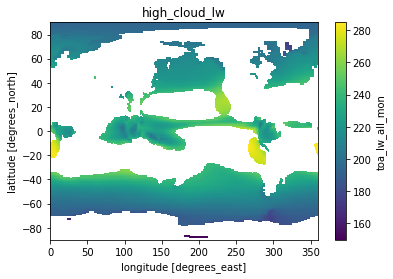

In [10]:
cloud = ds.cldarea_total_daynight_mon.mean('time').values
high_cloud_area = cloud > 75#将>75的值判定为高云域，输出为布尔矩阵
low_cloud_area = cloud < 25 #将<25的值判定为低云域,输出为布尔矩阵
high_cloud_lw = ds_lw_all.where(high_cloud_area)
high_cloud_lw.plot()
plt.title('high_cloud_lw')#高云域长波


**再画低云域长波**

Text(0.5,1,'low_cloud_lw')

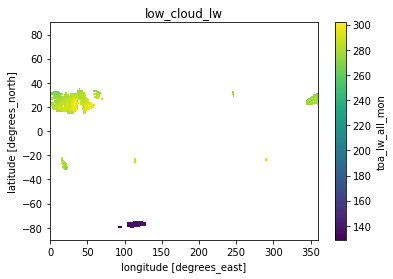

In [11]:
low_cloud_lw = ds_lw_all.where(low_cloud_area)
low_cloud_lw.plot()
plt.title('low_cloud_lw')#低云域长波

**再画高云域短波**

Text(0.5,1,'high_cloud_sw')

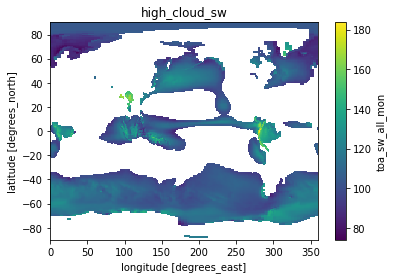

In [12]:
high_cloud_sw = ds_sw_all.where(high_cloud_area)
high_cloud_sw.plot()
plt.title('high_cloud_sw')#高云域短波

**再画低云域短波**

Text(0.5,1,'low_cloud_sw')

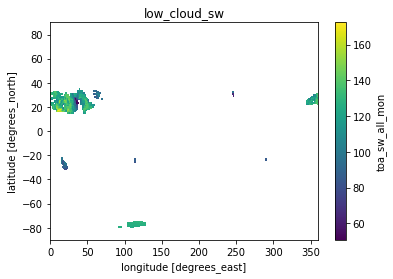

In [13]:
low_cloud_sw = ds_sw_all.where(low_cloud_area)
low_cloud_sw.plot()
plt.title('low_cloud_sw')#低云域短波

**<font size=6 >2.5 [5 points] Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?</font>**

<font size=6 >**根据计算出的值容易得到，高云域相比低云域反射的辐射更低**</font>

In [14]:
high_cloud_global_lw_mean = high_cloud_lw.mean(dim = ['lat','lon'])
low_cloud_global_lw_mean = low_cloud_lw.mean(dim = ['lat','lon'])
high_cloud_global_sw_mean = high_cloud_sw.mean(dim = ['lat','lon'])
low_cloud_global_sw_mean = low_cloud_sw.mean(dim = ['lat','lon'])
print('high_cloud_global_lw_mean = ' + str(high_cloud_global_lw_mean.values))
print('low_cloud_global_lw_mean = ' + str(low_cloud_global_lw_mean.values))
print('high_cloud_global_sw_mean = ' + str(high_cloud_global_sw_mean.values))
print('low_cloud_global_sw_mean = ' + str(low_cloud_global_sw_mean.values))


high_cloud_global_lw_mean = 216.55675
low_cloud_global_lw_mean = 270.10367
high_cloud_global_sw_mean = 108.09777
low_cloud_global_sw_mean = 122.65546


<font size=6 >3. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format, and have temporal information.</font>

**<font size=6 >3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.</font>**

**先画出每月的均值**

Text(0.5,1,'sst_time_mean')

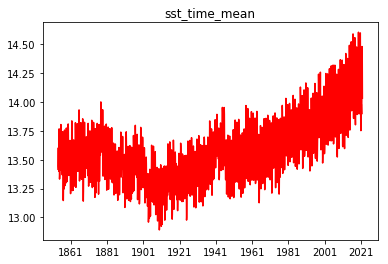

In [15]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
ds_3 = xr.open_dataset('C:\\Users\\Cao Zhe\\Desktop\\sustech zy\\hjbc\\PS3\sst.mnmean.nc', engine="netcdf4")
ds_sst = ds_3.sst.mean(dim = ['lat','lon'])
X = ds_sst['time'].values
plt.plot(X,ds_sst,color = 'r')
plt.title('sst_time_mean')

**<font size=6 >3.2 [5 points] Make at least 5 different plots using the dataset.</font>**

**画出全世界的均值**

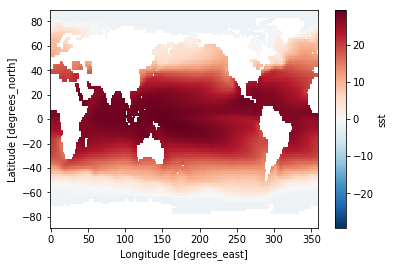

In [16]:
ds_time = ds_3.sst.mean(dim = ['time'])
ds_time.plot()

**画出北半球的均值**

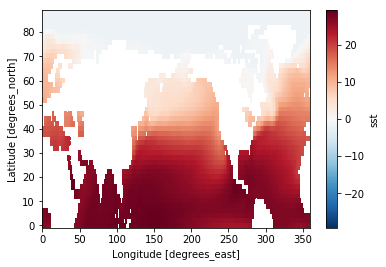

In [17]:
north = ds_3.sst.sel(lat = slice(88,0))
ds_north = north.mean(dim = ['time'])
ds_north.plot()

**画出南半球的均值**

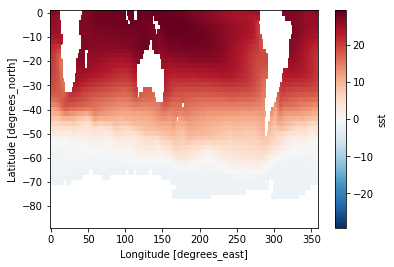

In [18]:
south = ds_3.sst.sel(lat = slice(0,-88))
ds_south = south.mean(dim = ['time'])
ds_south.plot()

**画出中国的均值**

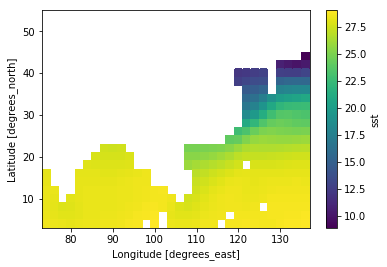

In [19]:
china = ds_3.sst.sel(lat = slice(54,3),lon = slice(73,136))
ds_china = china.mean(dim = ['time'])
ds_china.plot()

**画出美国的均值**

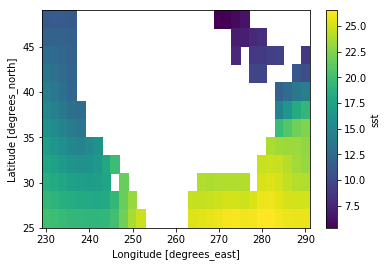

In [20]:
america = ds_3.sst.sel(lat = slice(49,25),lon = slice(230,290))
ds_america = america.mean(dim = ['time'])
ds_america.plot()

**画出俄罗斯的均值**

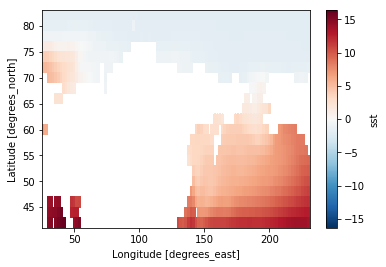

In [21]:
russia = ds_3.sst.sel(lat = slice(82,41),lon = slice(26,230))
ds_russia = russia.mean(dim = ['time'])
ds_russia.plot()